In [48]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

Butadiene = """  C    0.0000000   -0.1296399    1.8247010
  C    0.0000000    0.4192304    0.6078236
  C    0.0000000   -0.4192304   -0.6078236
  C    0.0000000    0.1296399   -1.8247010
  H    0.0000000    0.5043713    2.7054618
  H    0.0000000   -1.2078298    1.9552765
  H    0.0000000    1.5023424    0.5188188
  H    0.0000000   -1.5023424   -0.5188188
  H    0.0000000    1.2078298   -1.9552765
  H    0.0000000   -0.5043713   -2.7054618
  """
carbon_coordinates = pts.taking_carbon_coordinates(Butadiene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

butadiene_molecule = gto.M(atom=Butadiene, basis='sto-3g')#'sto-6g''ccpvdz'
pz_indices = [i for i, label in enumerate(butadiene_molecule.ao_labels()) if 'C 2px' in label]
print(pz_indices)
hf = scf.RHF(butadiene_molecule)
hf_energy = hf.kernel()


ovp = hf.get_ovlp()[[2, 7, 12,17]][:, [2, 7, 12,17]]


print(ovp)

[[ 1.824701  -0.1296399]
 [ 0.6078236  0.4192304]
 [-0.6078236 -0.4192304]
 [-1.824701   0.1296399]]
[2, 7, 12, 17]
converged SCF energy = -153.01677836631
[[1.00000000e+00 2.39413565e-01 2.37022198e-02 8.66242843e-04]
 [2.39413565e-01 1.00000000e+00 1.85031828e-01 2.37022198e-02]
 [2.37022198e-02 1.85031828e-01 1.00000000e+00 2.39413565e-01]
 [8.66242843e-04 2.37022198e-02 2.39413565e-01 1.00000000e+00]]


In [49]:
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
mo_coeff = normaliseer(mo_coeff)
print(mo_coeff)

[[ 1.95635514e-02  1.73978371e-02 -7.06299064e-01  7.06369098e-01
  -1.38465928e-01  1.86363471e-01 -1.46325956e-01 -7.04566445e-02
  -1.14743635e-02 -2.50374578e-02 -5.73703943e-03  3.11602678e-02
  -5.34992450e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.12276536e-03  9.23894962e-03  1.02774853e-02
   7.63658282e-02 -7.21295764e-02 -1.85121621e-02  3.46952388e-02
   1.60308948e-02  3.85427655e-02]
 [-5.02662693e-03 -4.83675981e-03 -2.59142150e-02  2.57158843e-02
   3.57935065e-01 -4.99685953e-01  4.36993800e-01  2.20622868e-01
   4.69211651e-02  1.03247570e-01  9.66994923e-03 -8.82687484e-02
   9.96253735e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  5.57692922e-02 -7.27801019e-02 -7.04552606e-02
  -4.84669329e-01  4.60825099e-01  1.25764463e-01 -2.53880184e-01
  -1.25006998e-01 -3.06098316e-01]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.0

In [50]:
mo_eigenvalues = hf.mo_energy[[13,14,15,16]]
print(mo_eigenvalues)
pz_orbitals = mo_coeff[pz_indices][:,[13,14,15,16]]
print(pz_orbitals)

[-0.39399073 -0.26428405  0.25016957  0.41404144]
[[ 0.43006898 -0.56176043  0.56763944  0.41336716]
 [ 0.56128484 -0.42944758 -0.42164614 -0.57369643]
 [ 0.56128484  0.42944758 -0.42164614  0.57369643]
 [ 0.43006898  0.56176043  0.56763944 -0.41336716]]


In [51]:
number_of_electrons = 4
D = np.zeros((4,4))
print(D)
elec_to_place = number_of_electrons
print()
for i in range(4):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((pz_orbitals[:,i]).reshape(-1,1) @ (pz_orbitals[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
print(D.round(6))
print(np.diag(D))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[ 1.001068e+00  9.652760e-01  2.890000e-04 -2.612310e-01]
 [ 9.652760e-01  9.989320e-01  2.612310e-01  2.890000e-04]
 [ 2.890000e-04  2.612310e-01  9.989320e-01  9.652760e-01]
 [-2.612310e-01  2.890000e-04  9.652760e-01  1.001068e+00]]
[1.00106821 0.99893179 0.99893179 1.00106821]


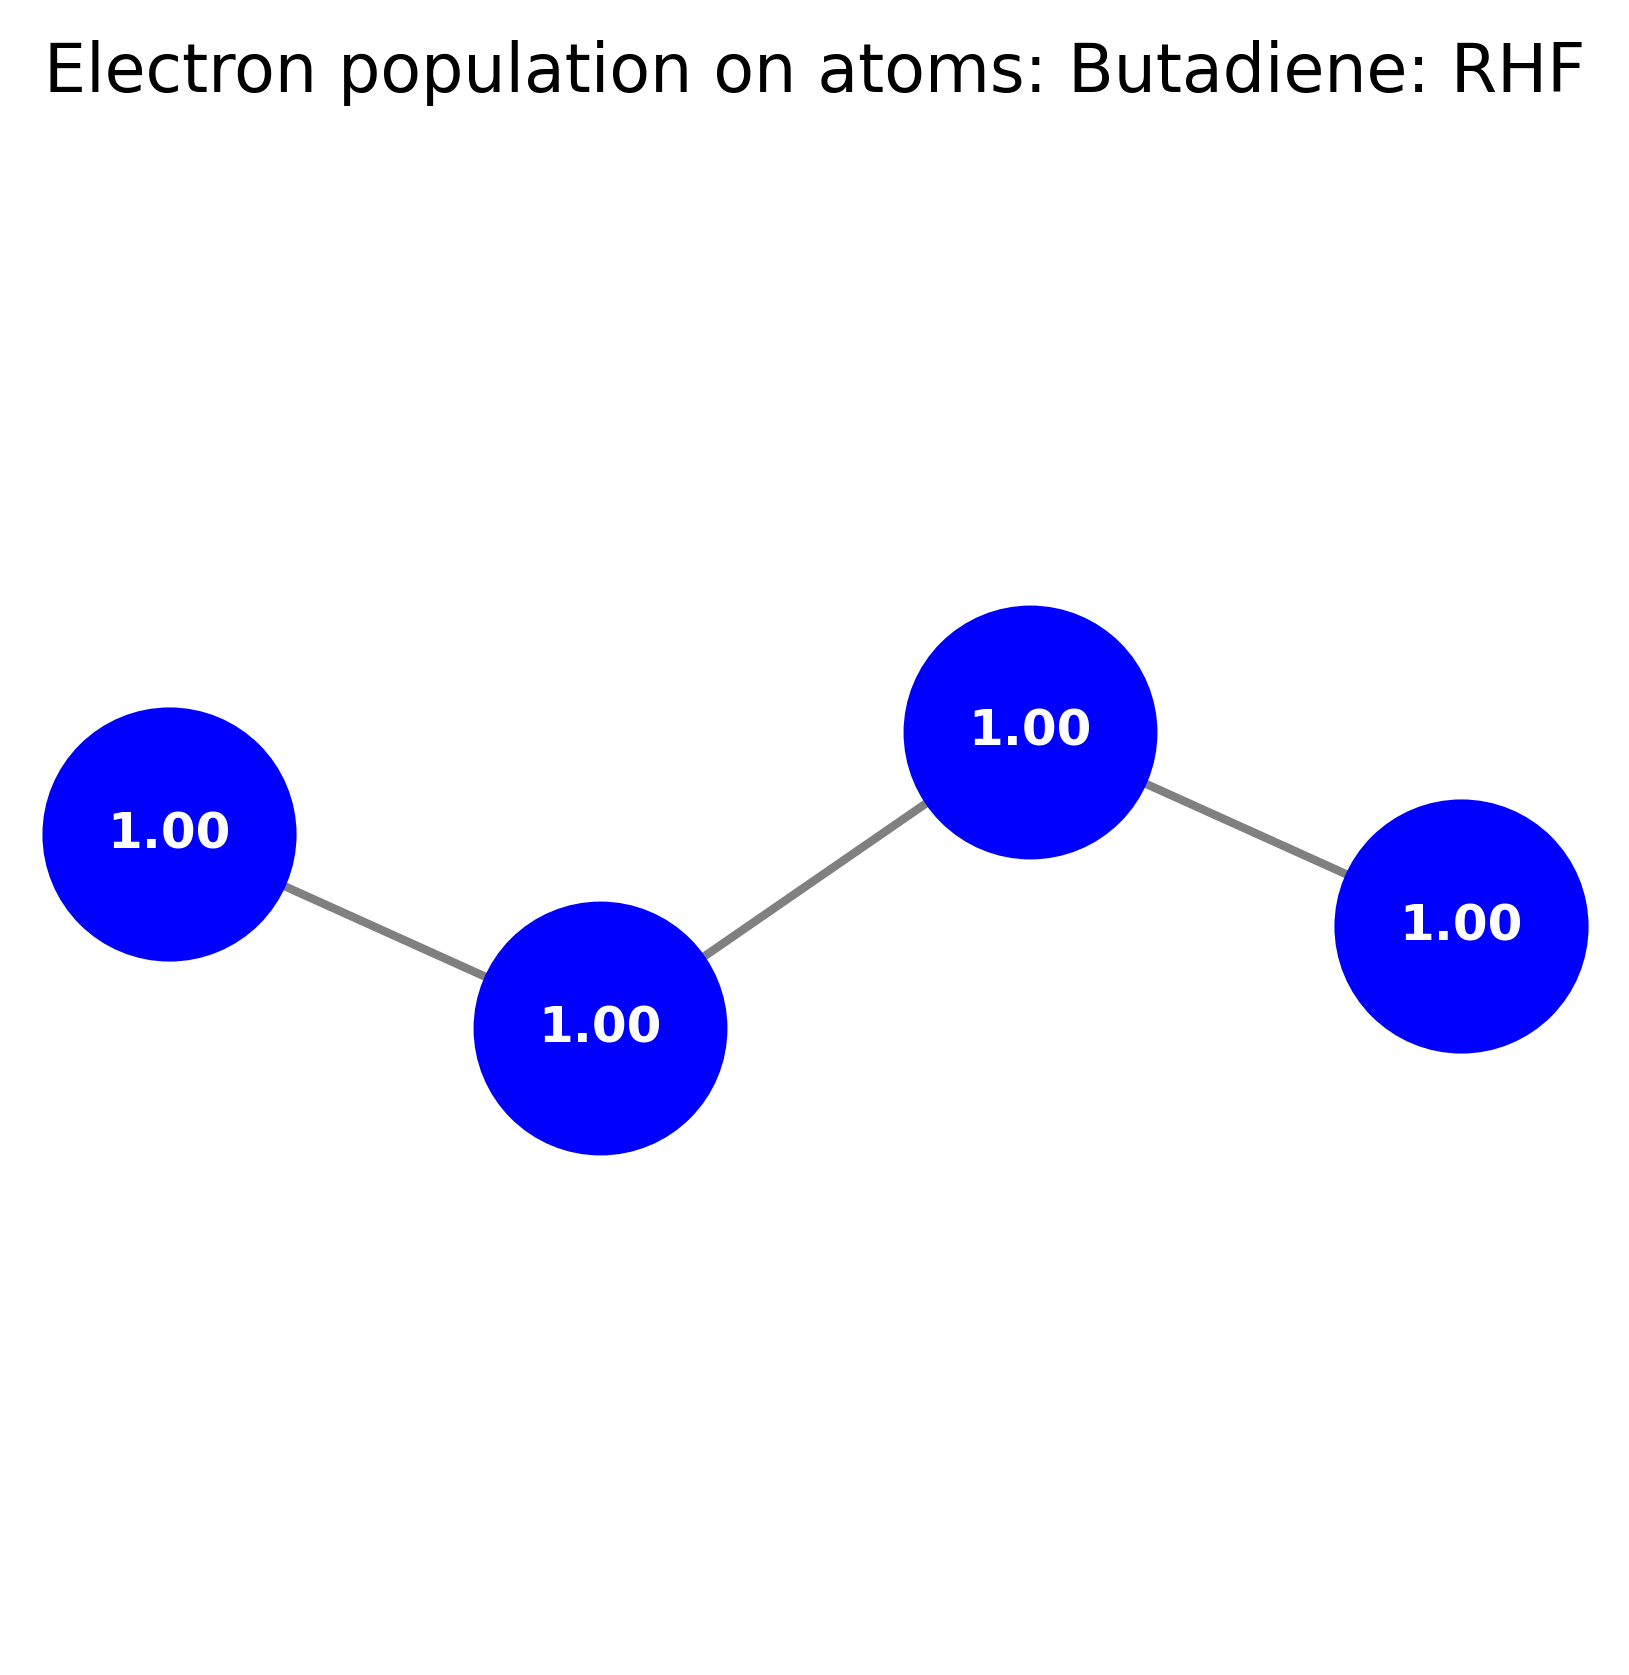

In [52]:
pts.plotting_of_D_atoms(4,coordinates, [], D, 'Butadiene', 'RHF')

In [53]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, theory):
    transposed_eigenvectors = eigenvectors.T

    # Bepaal het aantal rijen en kolommen voor subplots
    num_rows = 2
    num_cols = 2
    
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5, 4), dpi=400)
    
    for i in range(len(eigenvalues)):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        # Punten op een lijn
        line_x = np.linspace(0, number_of_atoms - 1, number_of_atoms)
        line_y = np.zeros(number_of_atoms)
        
        ax.plot(line_x, line_y, linestyle='-', color='grey')
        
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'
            
            size = abs(c) * 1500  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(line_x[j], line_y[j], s=size, marker='o', color=color, zorder=2)
            
            # Coëfficiënten in de bollen tonen
            ax.text(line_x[j], 0, f'{c:.2f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')
        ax.margins(0.3)
        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle(f'Butadiene - {theory}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


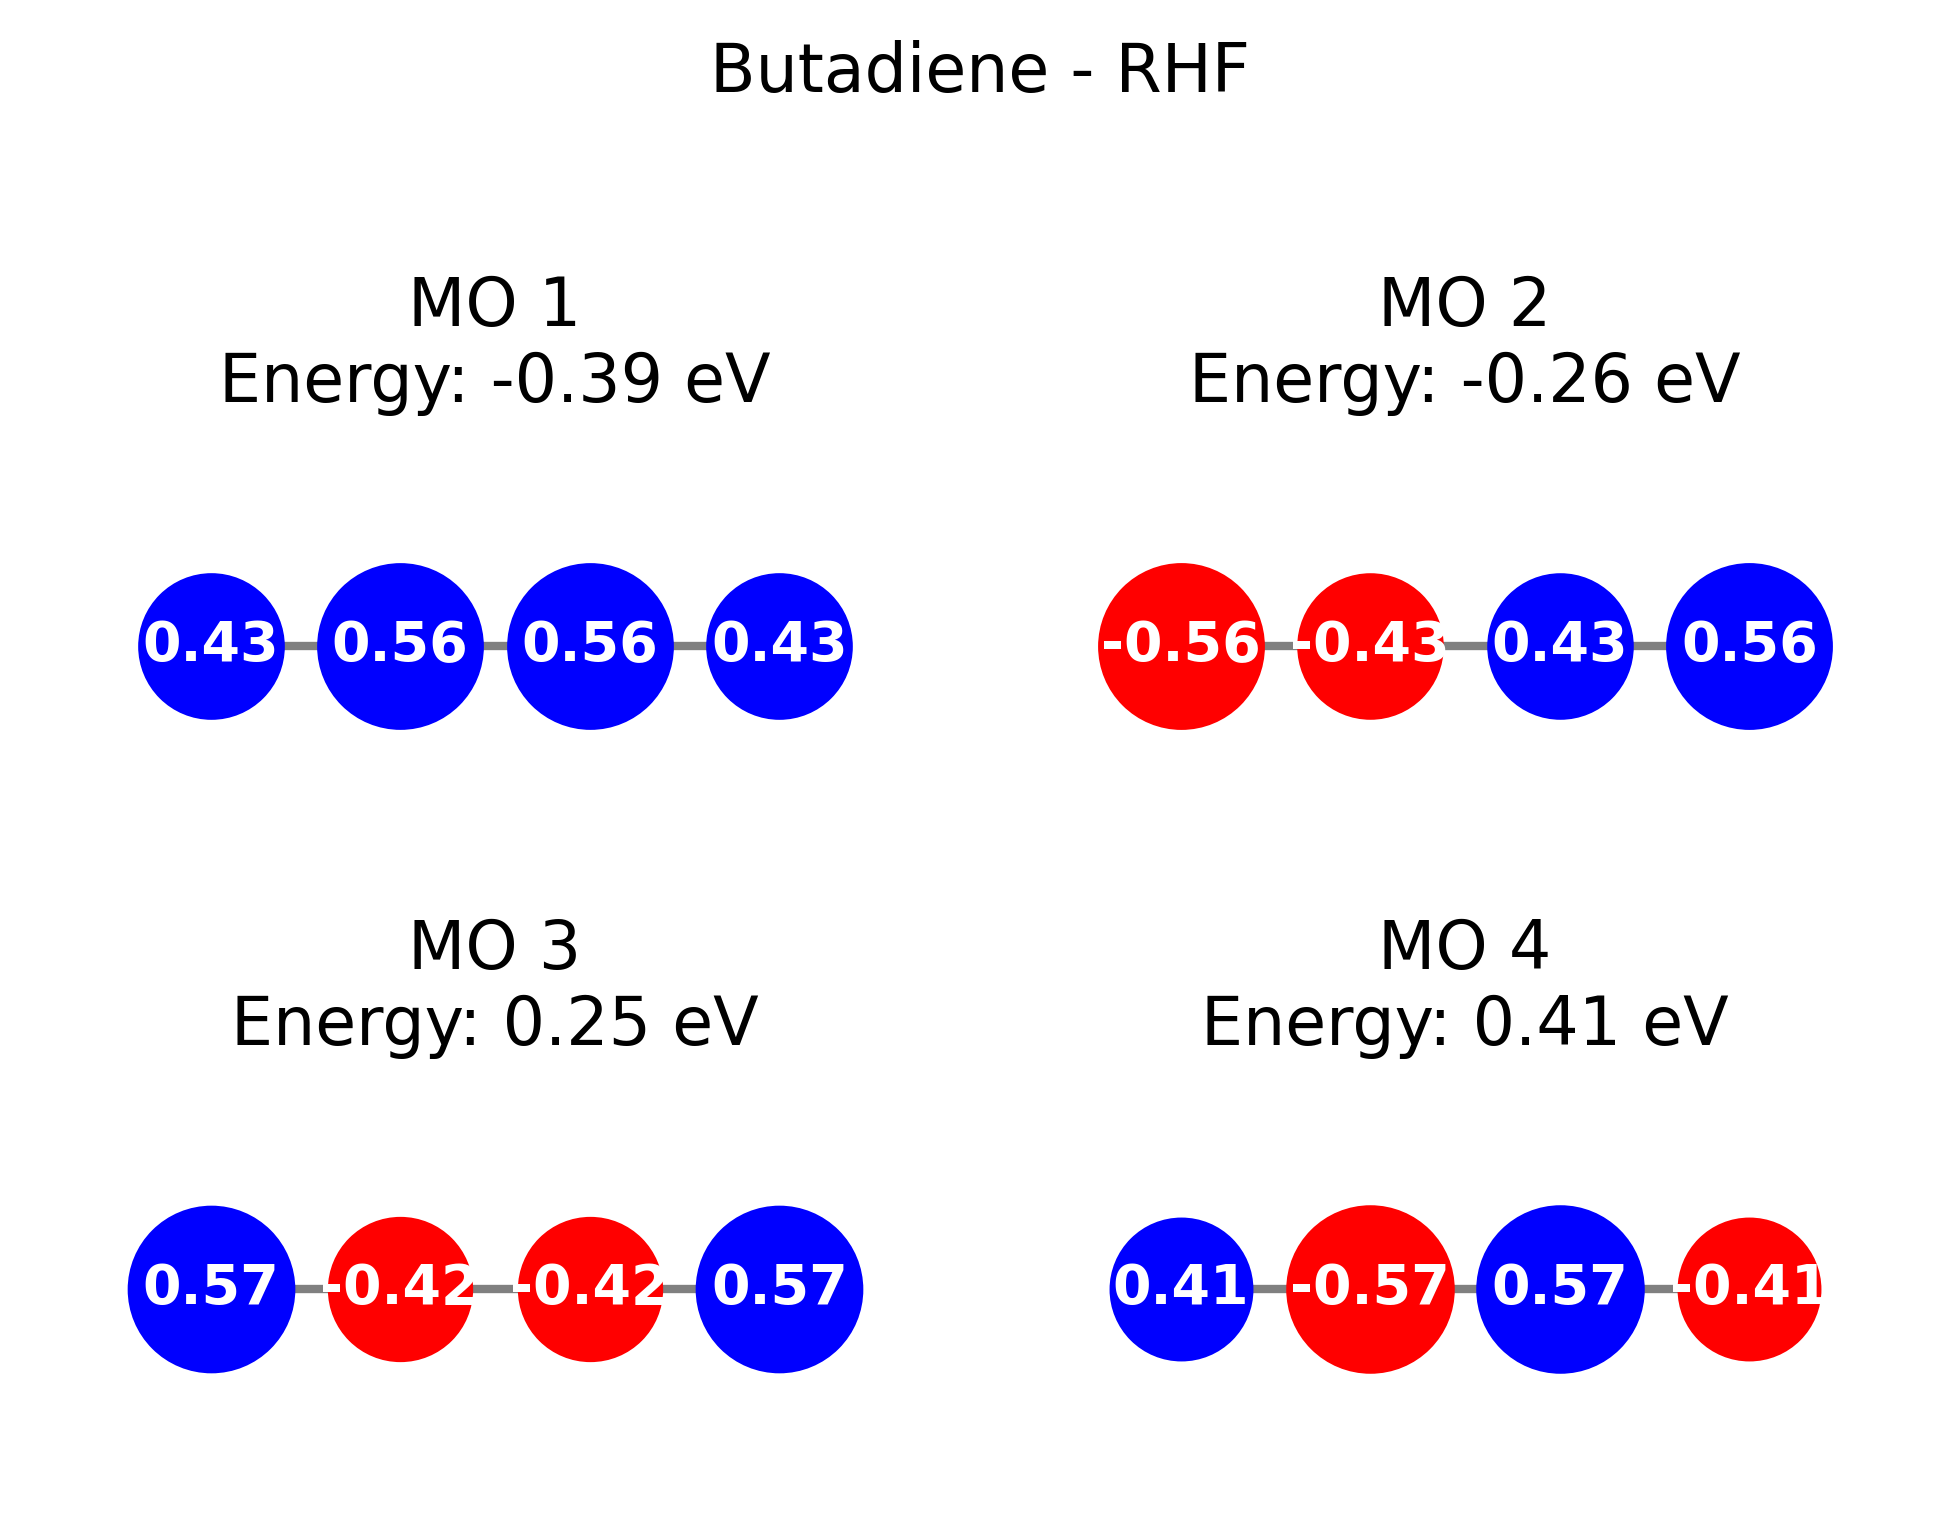

In [54]:
plotting_of_the_system(4, pz_orbitals, mo_eigenvalues, 'RHF')

In [55]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
Butadiene = huckel(4, 0, -0.25, configuration='line')
Butadiene.create_matrix()
# Dit is met de overlapmatrix
data = [[0, 2.39413565e-01, 0, 0],
        [2.39413565e-01, 0, 1.85031828e-01, 0],
        [0, 1.85031828e-01, 0, 2.39413565e-01],
        [0, 0, 2.39413565e-01, 0]]

# Converteer naar een NumPy-array en rond af op 3 decimalen
array = np.round(np.array(data), 6)

# Maak alle waarden negatief
neg_array = -array
print(neg_array)
eva, eve = np.linalg.eigh(neg_array)
print(eva, eve)

huc_mat = Butadiene.huckel_matrix


print(huc_mat)

[[-0.       -0.239414 -0.       -0.      ]
 [-0.239414 -0.       -0.185032 -0.      ]
 [-0.       -0.185032 -0.       -0.239414]
 [-0.       -0.       -0.239414 -0.      ]]
[-0.34918363 -0.16415163  0.16415163  0.34918363] [[-0.39985917  0.58319178  0.58319178 -0.39985917]
 [-0.58319178  0.39985917 -0.39985917  0.58319178]
 [-0.58319178 -0.39985917 -0.39985917 -0.58319178]
 [-0.39985917 -0.58319178  0.58319178  0.39985917]]
[[ 0.   -0.25  0.    0.  ]
 [-0.25  0.   -0.25  0.  ]
 [ 0.   -0.25  0.   -0.25]
 [ 0.    0.   -0.25  0.  ]]


In [56]:
Butadiene.solve_huckel_matrix()
eigenvalues = Butadiene.eigenvalues
print(eigenvalues)
eigenvectors = Butadiene.eigenvectors

eigenvectors[:,3] = - eigenvectors[:,3] 
print(eigenvectors)

[-0.404508 -0.154508  0.154508  0.404508]
[[ 0.37174799 -0.60150098  0.60150098  0.37174799]
 [ 0.60150098 -0.37174799 -0.37174799 -0.60150098]
 [ 0.60150098  0.37174799 -0.37174799  0.60150098]
 [ 0.37174799  0.60150098  0.60150098 -0.37174799]]


In [57]:
D = np.zeros((4,4))
print(D)
elec_to_place = number_of_electrons
print()
for i in range(4):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((eigenvectors[:,i]).reshape(-1,1) @ (eigenvectors[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
print(D.round(6))
print(np.diag(D))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[ 1.        0.894427  0.       -0.447214]
 [ 0.894427  1.        0.447214  0.      ]
 [ 0.        0.447214  1.        0.894427]
 [-0.447214  0.        0.894427  1.      ]]
[1. 1. 1. 1.]


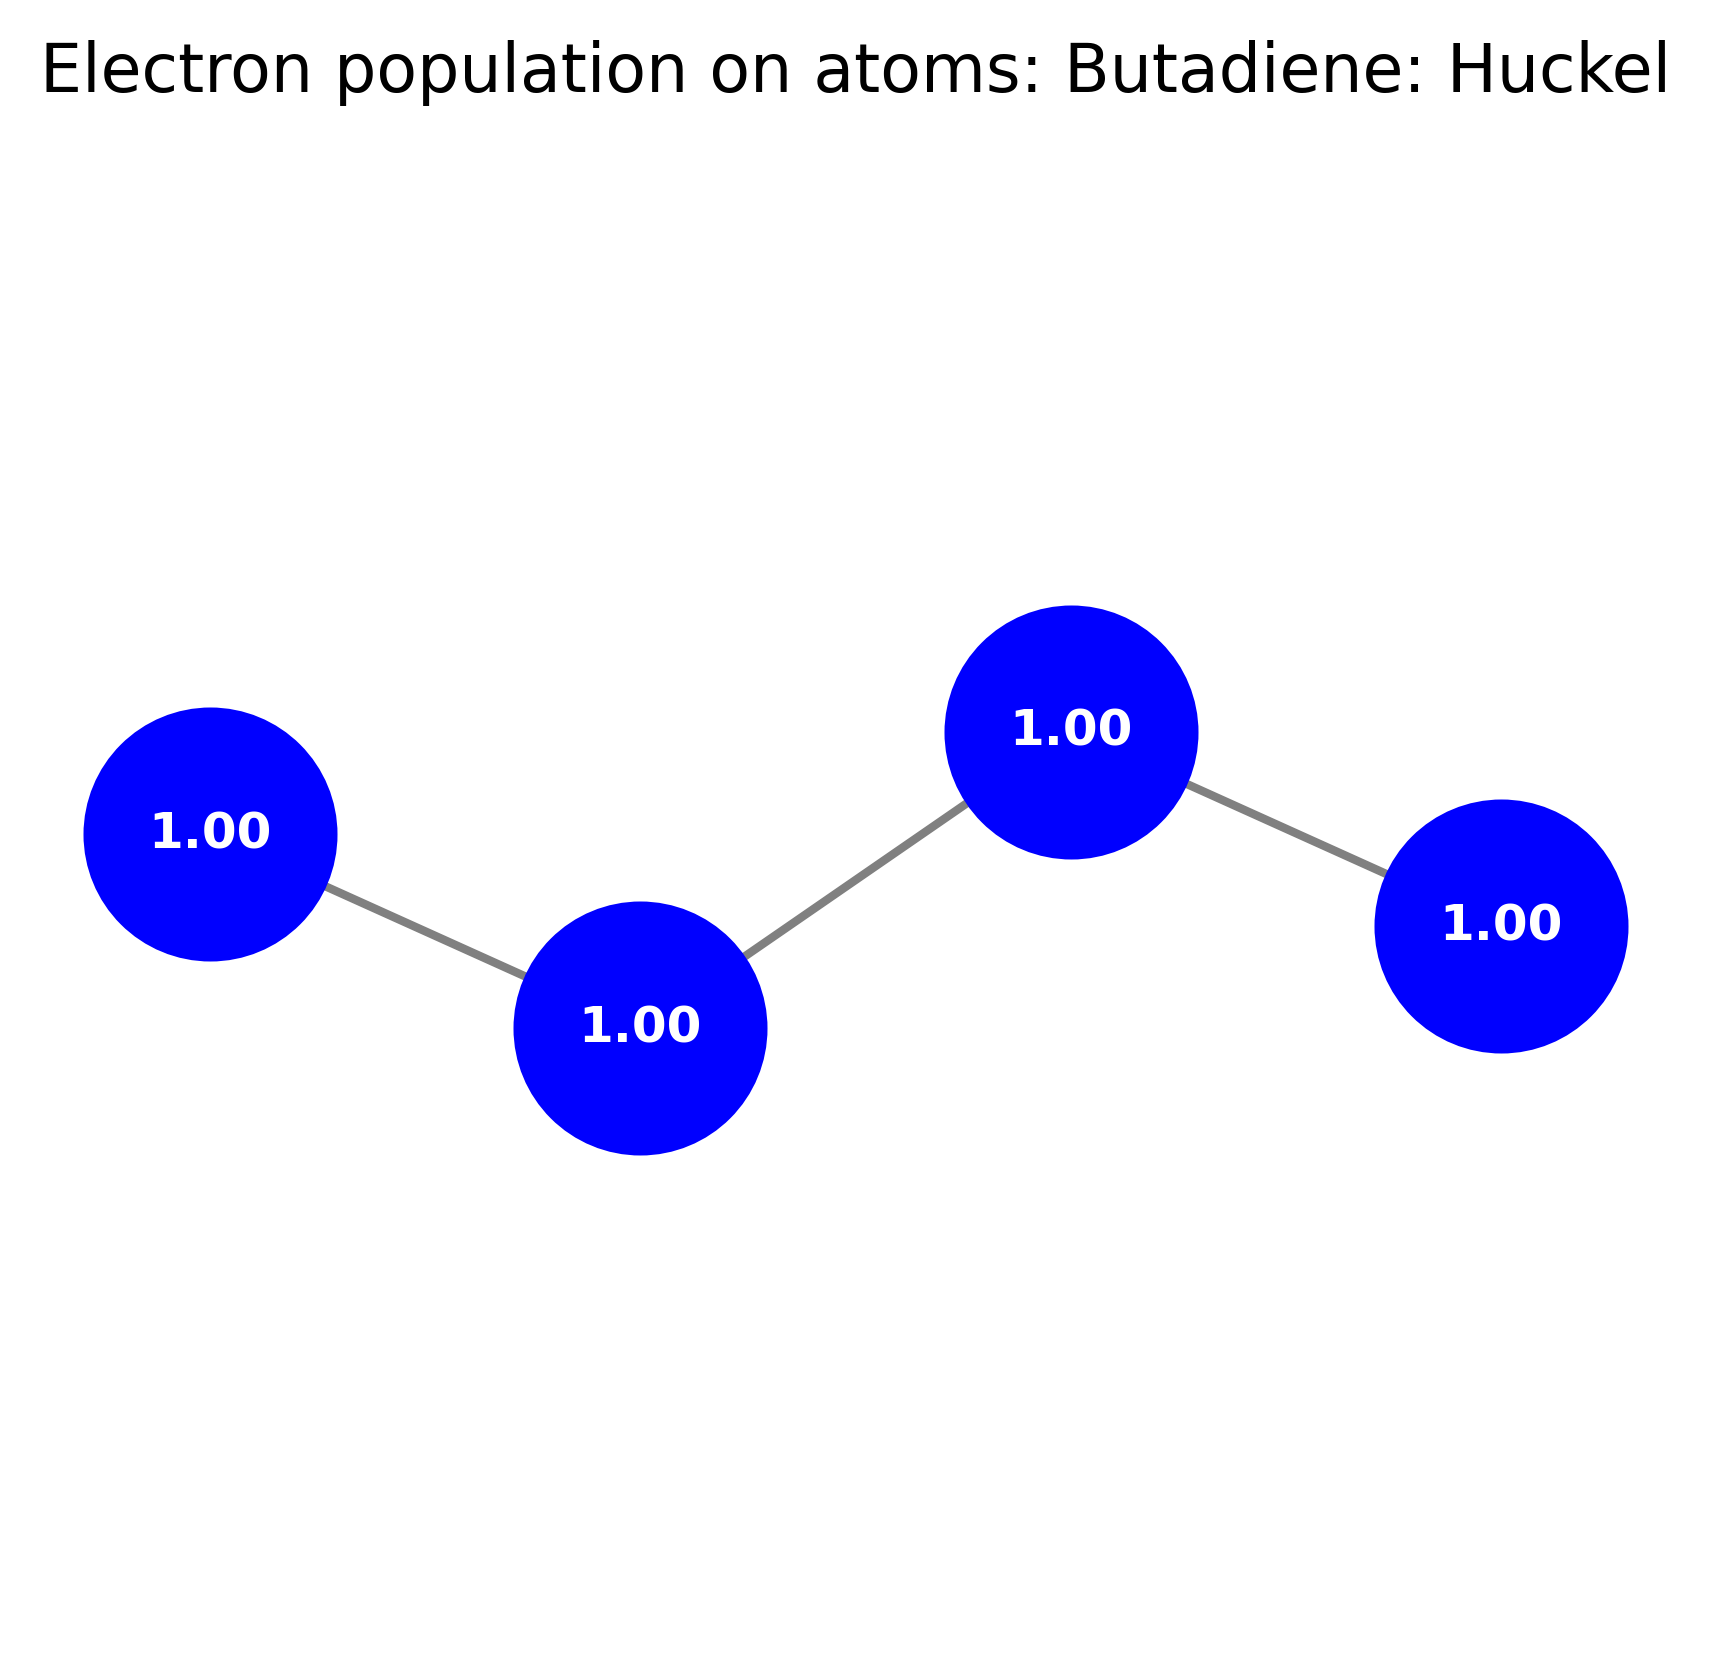

In [58]:
pts.plotting_of_D_atoms(4,coordinates, [], D, 'Butadiene', 'Huckel')

In [59]:
D = np.zeros((4,4))
print(D)
elec_to_place = number_of_electrons
print()
for i in range(4):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((eve[:,i]).reshape(-1,1) @ (eve[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
print(D.round(6))
print(np.diag(D))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[ 1.        0.932778 -0.       -0.360451]
 [ 0.932778  1.        0.360451  0.      ]
 [-0.        0.360451  1.        0.932778]
 [-0.360451  0.        0.932778  1.      ]]
[1. 1. 1. 1.]


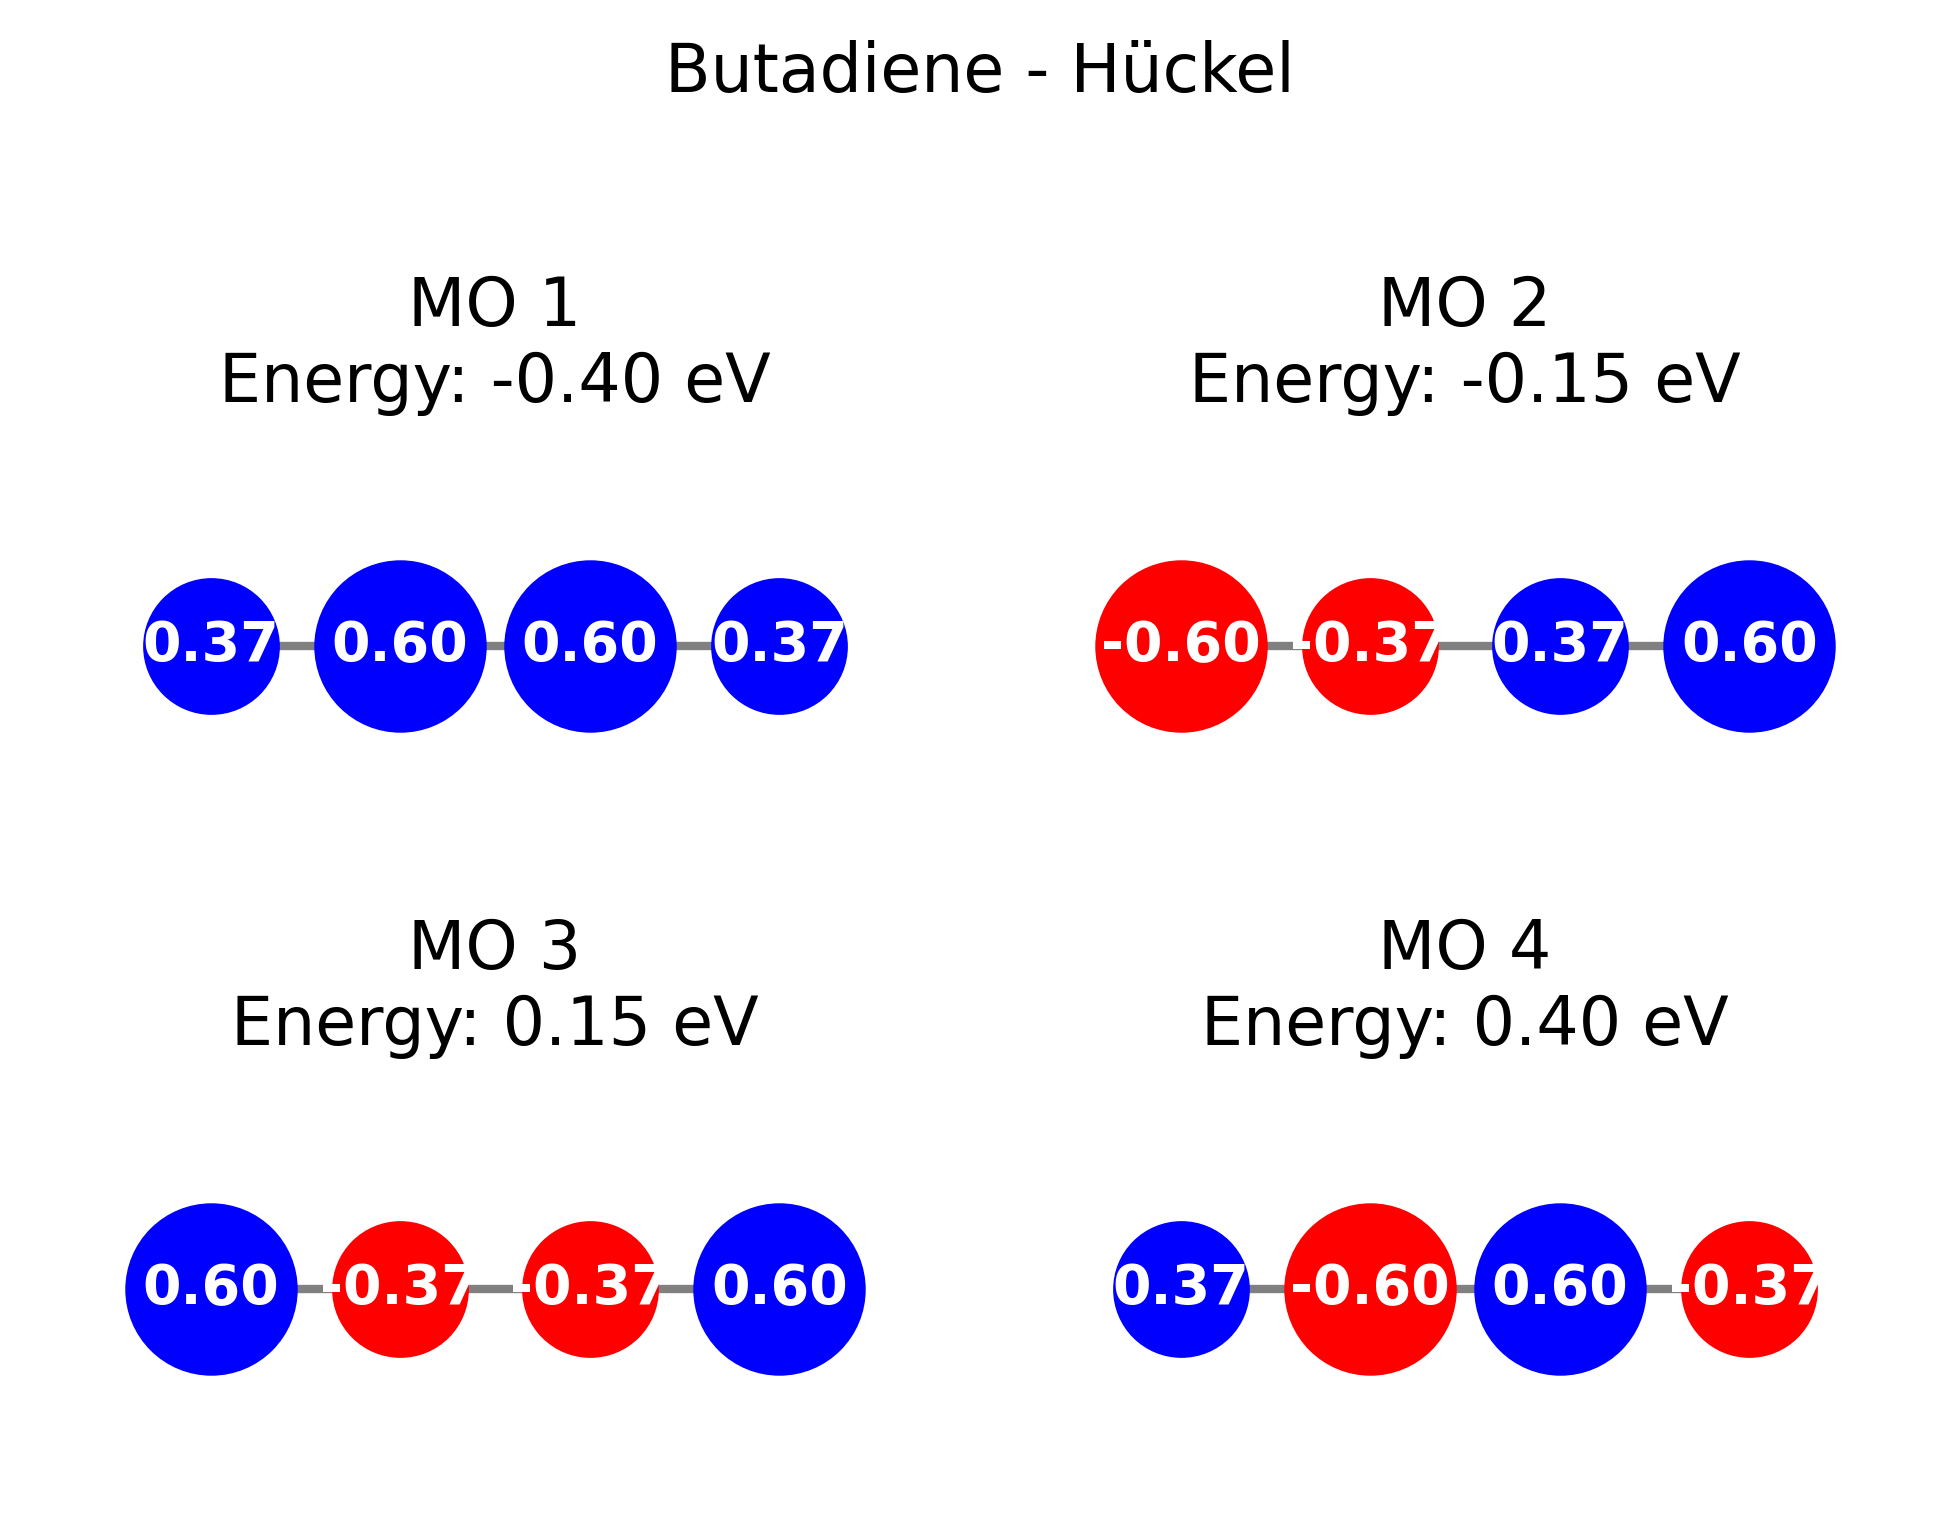

In [60]:
plotting_of_the_system(4, eigenvectors, eigenvalues, 'Hückel')

In [61]:
molecule =   """
  C    0.0000000    0.5309205   -1.5100332
  C    0.0000000   -0.5667716   -0.7426556
  C   -0.0000000   -0.5667716    0.7426556
  C   -0.0000000    0.5309205    1.5100332
  H    0.0000000    0.4275424   -2.5904012
  H    0.0000000    1.5328407   -1.0998658
  H   -0.0000000   -1.5331682   -1.2377173
  H   -0.0000000   -1.5331682    1.2377173
  H    0.0000000    1.5328407    1.0998658
  H   -0.0000000    0.4275424    2.5904012
"""


In [62]:
carbon_lines = [line.split()[1:] for line in molecule.split('\n') if line.startswith('  C')]

# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = np.array(carbon_lines, dtype=float)

print(carbon_coordinates)
_molecule = gto.M(atom=molecule, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = [i for i, label in enumerate(_molecule.ao_labels()) if 'C 2px' in label]
print(pz_indices)
hf = scf.RHF(_molecule)
hf_energy = hf.kernel()


[[ 0.         0.5309205 -1.5100332]
 [ 0.        -0.5667716 -0.7426556]
 [-0.        -0.5667716  0.7426556]
 [-0.         0.5309205  1.5100332]]
[2, 7, 12, 17]


converged SCF energy = -153.014830885665


In [63]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, theory):
    transposed_eigenvectors = eigenvectors.T

    # Bepaal het aantal rijen en kolommen voor subplots
    num_rows = 2
    num_cols = 2
    
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5, 5), dpi=400)
    
    for i in range(len(eigenvalues)):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        # Punten op een lijn
        line_y = carbon_coordinates[:, 1]
        line_x = carbon_coordinates[:, 2]
        ax.plot(line_x, line_y, linestyle='-', color='grey')
        
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'

            size = abs(c).round(6) * 1000  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(line_x[j], line_y[j], s=size, marker='o', color=color, zorder=2)
            
            # Coëfficiënten in de bollen tonen
            if c.round(3) != 0:
                ax.text(line_x[j], line_y[j], f'{c:.2f}', ha='center', va='center', fontsize=7, color='white', fontweight='bold')

        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')
        
        ax.set_xlim(line_x.min() - 1, line_x.max() + 1)
        ax.set_ylim(line_y.min() - 1, line_y.max() + 1)

        ax.margins(0.3)
        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle(f'Butadiene - {theory}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


In [64]:
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
mo_coeff = normaliseer(mo_coeff)
print(mo_coeff)

[[-2.05345801e-02  1.89549711e-02  7.06276276e-01  7.06328856e-01
  -1.41648084e-01 -1.82751399e-01 -1.42398416e-01  8.49844370e-02
   1.83378240e-02  4.80577865e-03 -1.37850147e-02 -2.11678456e-02
   5.34043007e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  1.01546230e-02  1.99177037e-02 -7.73963154e-02
   4.40702016e-02  5.79103422e-02 -4.34845704e-03  3.87682354e-02
   7.23192502e-03 -3.73224145e-02]
 [ 4.93192563e-03 -4.66046428e-03  2.58409725e-02  2.57315582e-02
   3.68553905e-01  4.92231265e-01  4.16289497e-01 -2.76634984e-01
  -6.03197360e-02  8.44175386e-03  3.67580365e-02  6.38065417e-02
  -7.17817608e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.98803753e-02 -1.16805201e-01  4.89394561e-01
  -2.75710107e-01 -3.83916354e-01  4.11343614e-02 -2.82005155e-01
  -5.17694321e-02  2.95821173e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.0

In [65]:
mo_eigenvalues = hf.mo_energy[[13,14, 15, 16]]
print(mo_eigenvalues)
pz_orbitals = mo_coeff[pz_indices][:,[13,14, 15, 16]]
print(pz_orbitals)

[-0.38974292 -0.26570169  0.24515868  0.41508561]
[[ 0.43025885 -0.56057128  0.56683357  0.41627942]
 [ 0.56113931 -0.43099865 -0.42272887 -0.57158678]
 [ 0.56113931  0.43099865 -0.42272887  0.57158678]
 [ 0.43025885  0.56057128  0.56683357 -0.41627942]]


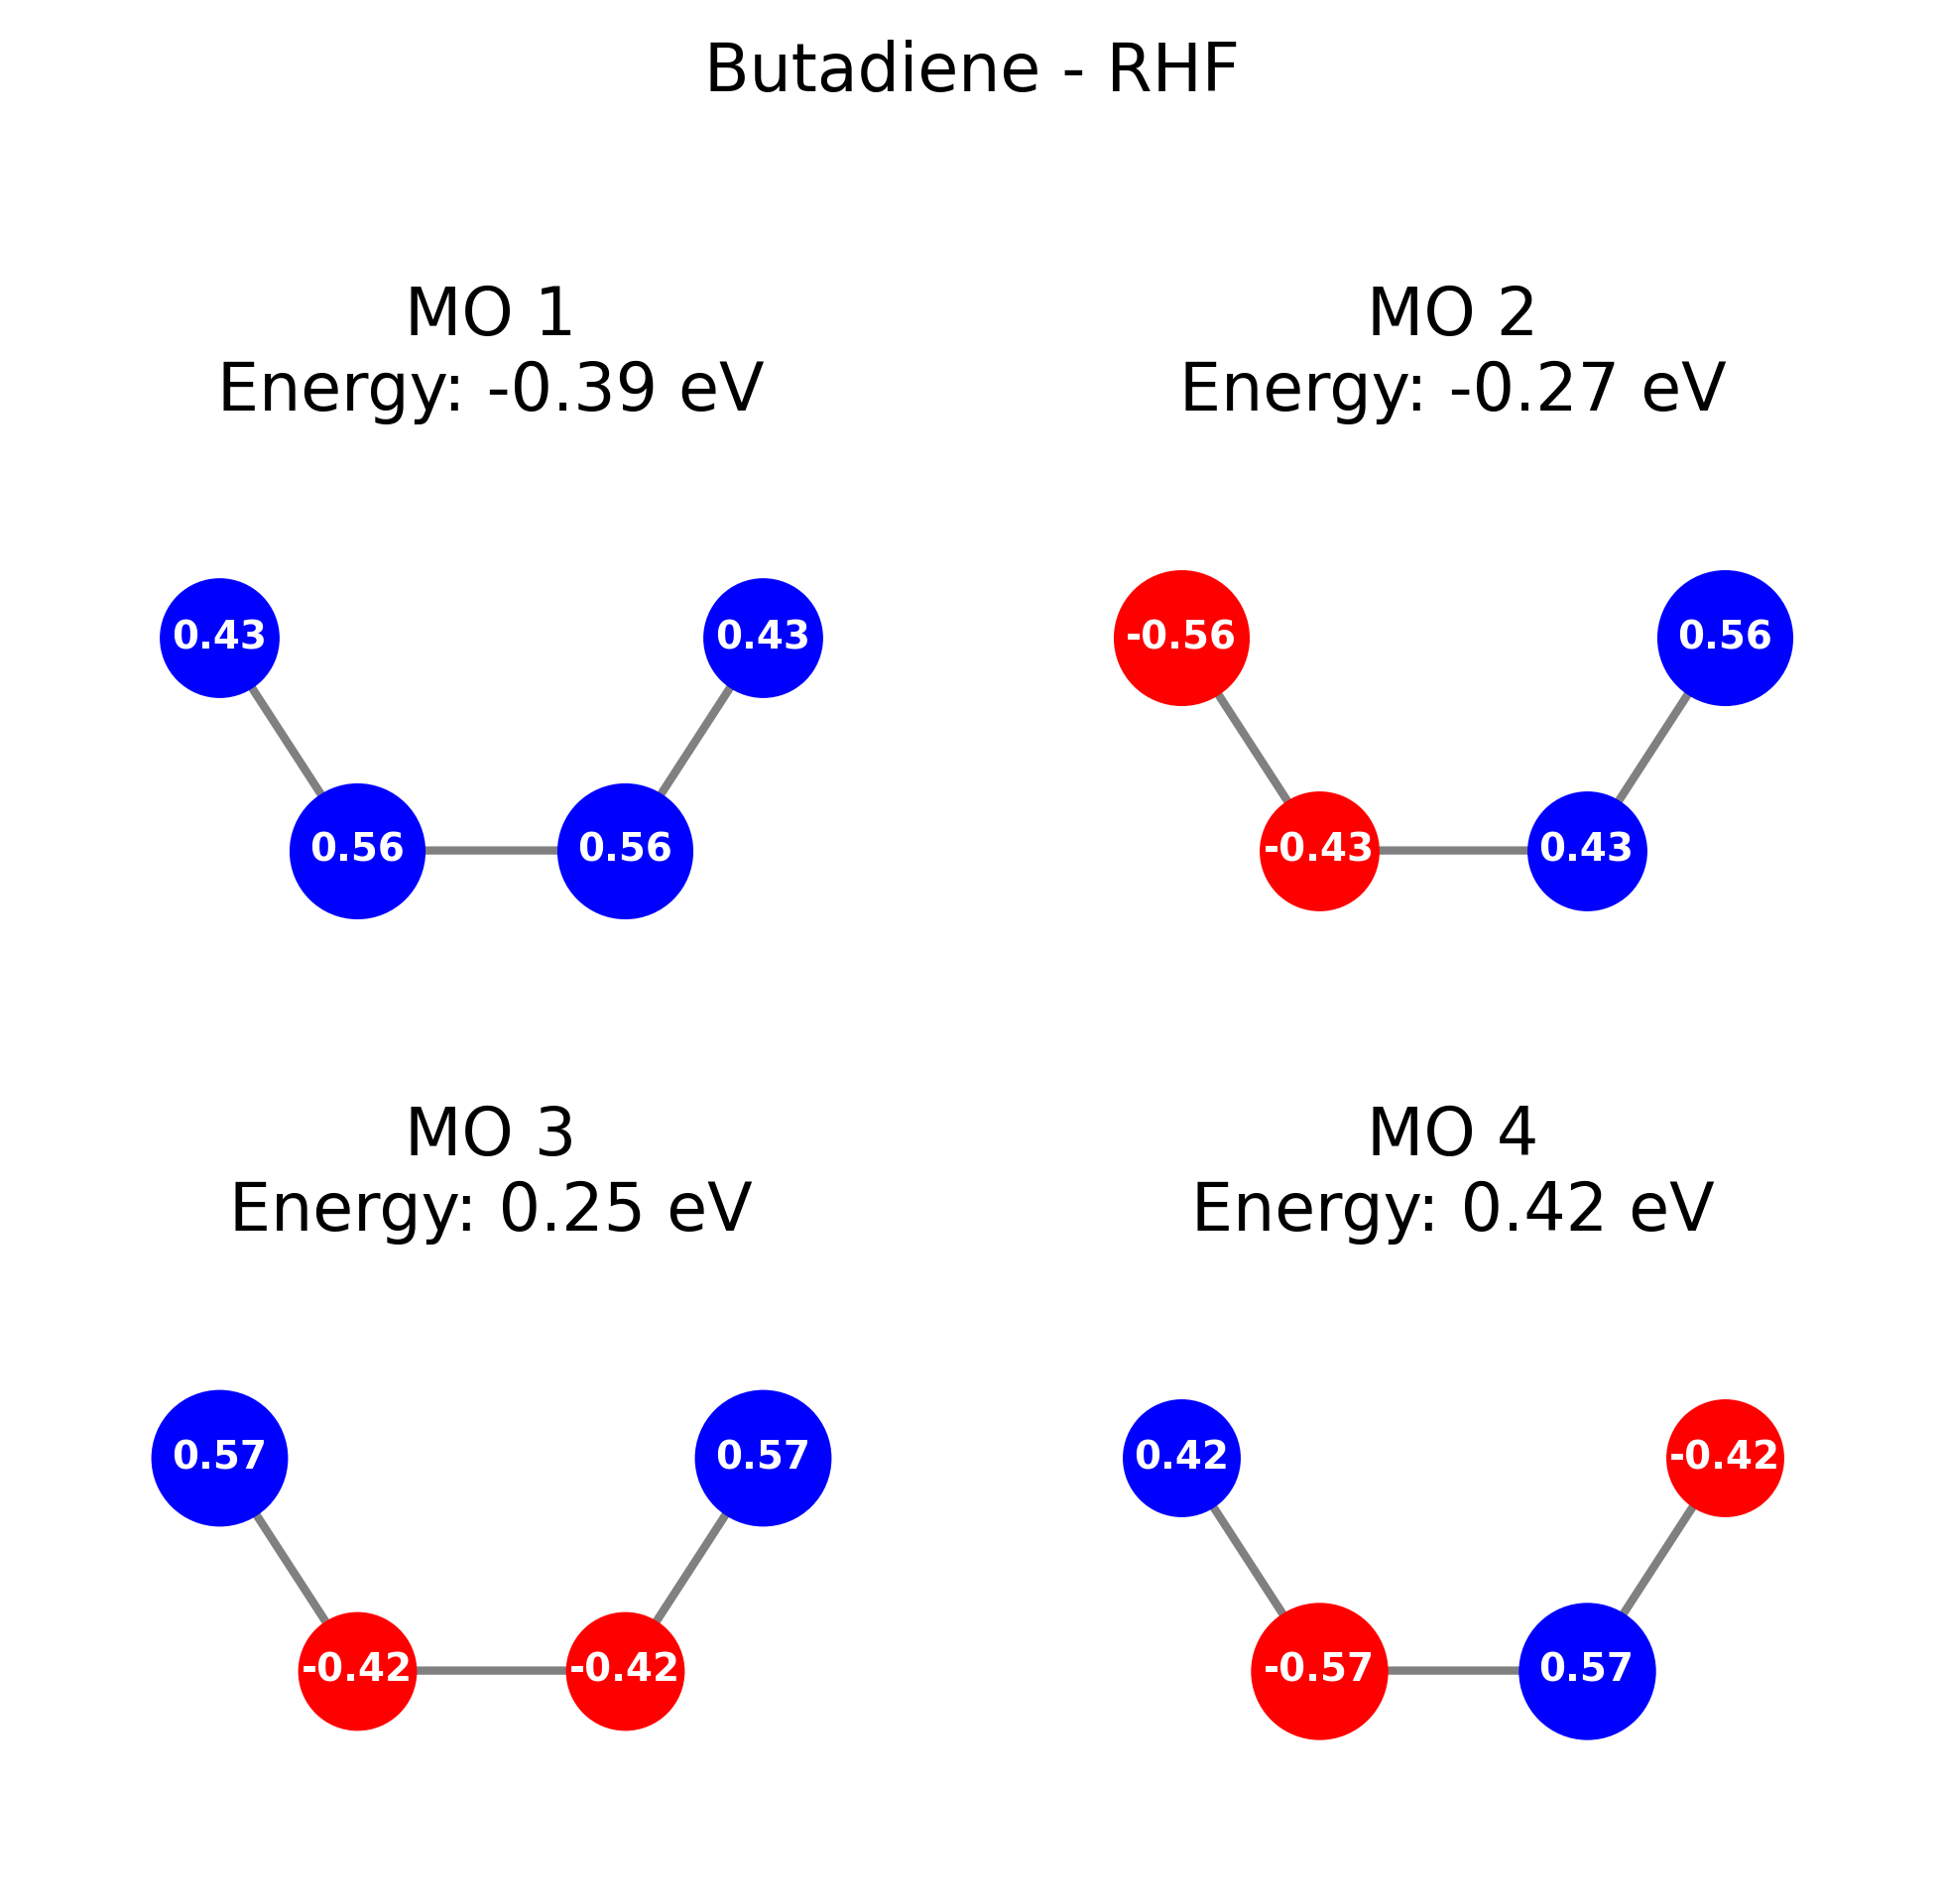

In [66]:
plotting_of_the_system(4, pz_orbitals, mo_eigenvalues, 'RHF')

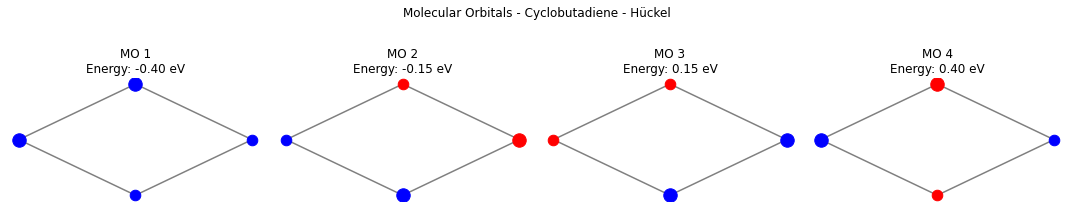

In [67]:
Butadiene.plotting_of_the_system()

In [68]:
a, b = symbols('alpha beta')

huckel_parametric_matrix = Matrix([
            [a, b, 0, 0],
            [b, a, b, 0],
            [0, b, a, b],
            [0, 0, b, a],
            
        ])
pprint(huckel_parametric_matrix)
eigeninfo = huckel_parametric_matrix.eigenvects()
eigval_para = np.array([])

for eigenvalue, multiplicity, eigenvectors in eigeninfo: 
    for _ in eigenvectors:
        eigval_para = np.append(eigval_para, eigenvalue)
print(eigeninfo)
pprint(eigval_para)

⎡α  β  0  0⎤
⎢          ⎥
⎢β  α  β  0⎥
⎢          ⎥
⎢0  β  α  β⎥
⎢          ⎥
⎣0  0  β  α⎦
[(alpha - beta/2 + sqrt(5)*beta/2, 1, [Matrix([
[                                                  -1],
[ alpha/beta - (alpha - beta/2 + sqrt(5)*beta/2)/beta],
[-alpha/beta + (alpha - beta/2 + sqrt(5)*beta/2)/beta],
[                                                   1]])]), (alpha + beta/2 + sqrt(5)*beta/2, 1, [Matrix([
[                                                   1],
[-alpha/beta + (alpha + beta/2 + sqrt(5)*beta/2)/beta],
[-alpha/beta + (alpha + beta/2 + sqrt(5)*beta/2)/beta],
[                                                   1]])]), (alpha - sqrt(5)*beta/2 - beta/2, 1, [Matrix([
[                                                  -1],
[ alpha/beta - (alpha - sqrt(5)*beta/2 - beta/2)/beta],
[-alpha/beta + (alpha - sqrt(5)*beta/2 - beta/2)/beta],
[                                                   1]])]), (alpha - sqrt(5)*beta/2 + beta/2, 1, [Matrix([
[                                   

In [69]:
def convert_list_to_latex(expressions):
        latex_list = []

        for expression in expressions:
            terms = str(expression).split()
            latex_representation = ""

            for term in terms:
                if "*" in term:
                    factors = term.split("*")
                    for factor in factors:
                        if factor.isalpha():
                            latex_representation += rf'$\{factor}$'
                        else:
                            latex_representation += rf'{factor}'
                elif term.isalpha():
                    latex_representation += rf'$\{term}$'
                else:
                    latex_representation += term

                latex_representation += " "

            latex_list.append(latex_representation.strip())

        return latex_list

pprint(convert_list_to_latex(eigval_para))

[$\alpha$ - beta/2 + sqrt(5)beta/2, $\alpha$ + beta/2 + sqrt(5)beta/2, $\alpha
$ - sqrt(5)beta/2 - beta/2, $\alpha$ - sqrt(5)beta/2 + beta/2]
